In [36]:
from __future__ import absolute_import, print_function, division
import codecs
import glob
import multiprocessing
import os
import pprint
import re
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot

In [64]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/suraj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/suraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
book_filenames = sorted(glob.glob('/home/suraj/Repositories/Deep Learning/Word Vectors/Harry Potter word vectors/books/*.txt'))
print(book_filenames)

["/home/suraj/Repositories/Deep Learning/Word Vectors/Harry Potter word vectors/books/Book 1 - The Philosopher's Stone_djvu.txt", '/home/suraj/Repositories/Deep Learning/Word Vectors/Harry Potter word vectors/books/Book 2 - The Chamber of Secrets_djvu.txt', '/home/suraj/Repositories/Deep Learning/Word Vectors/Harry Potter word vectors/books/Book 3 - The Prisoner of Azkaban_djvu.txt', '/home/suraj/Repositories/Deep Learning/Word Vectors/Harry Potter word vectors/books/Book 4 - The Goblet of Fire_djvu.txt', '/home/suraj/Repositories/Deep Learning/Word Vectors/Harry Potter word vectors/books/Book 5 - The Order of the Phoenix_djvu.txt', '/home/suraj/Repositories/Deep Learning/Word Vectors/Harry Potter word vectors/books/Book 6 - The Half Blood Prince_djvu.txt', '/home/suraj/Repositories/Deep Learning/Word Vectors/Harry Potter word vectors/books/Book 7 - The Deathly Hallows_djvu.txt']


In [4]:
raw_corpus = u''

for file in book_filenames:
    print("Reading in book {0}".format(file))
    with codecs.open(file, 'r', encoding='utf-8') as book_file:
        raw_corpus += book_file.read()
    print("Added book to corpus, Corpus Length: {0}".format(len(raw_corpus)))

Reading in book /home/suraj/Repositories/Deep Learning/Word Vectors/Harry Potter word vectors/books/Book 1 - The Philosopher's Stone_djvu.txt
Added book to corpus, Corpus Length: 474429
Reading in book /home/suraj/Repositories/Deep Learning/Word Vectors/Harry Potter word vectors/books/Book 2 - The Chamber of Secrets_djvu.txt
Added book to corpus, Corpus Length: 1006137
Reading in book /home/suraj/Repositories/Deep Learning/Word Vectors/Harry Potter word vectors/books/Book 3 - The Prisoner of Azkaban_djvu.txt
Added book to corpus, Corpus Length: 1683115
Reading in book /home/suraj/Repositories/Deep Learning/Word Vectors/Harry Potter word vectors/books/Book 4 - The Goblet of Fire_djvu.txt
Added book to corpus, Corpus Length: 2870365
Reading in book /home/suraj/Repositories/Deep Learning/Word Vectors/Harry Potter word vectors/books/Book 5 - The Order of the Phoenix_djvu.txt
Added book to corpus, Corpus Length: 4479128
Reading in book /home/suraj/Repositories/Deep Learning/Word Vectors/Har

In [5]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [6]:
raw_sentences = tokenizer.tokenize(raw_corpus)

In [7]:
# Clean sentences and convert to words
def sentence_to_words(sentence):
    """
    
    :param sentence: Input sentences 
    :return: Return a list of words for the sentence
    """
    cleaned_sentence = re.sub("[^a-zA-Z]", " ", sentence)
    words = cleaned_sentence.split()
    return words

In [8]:
print(len(raw_sentences))

63914


In [9]:
print(raw_sentences[63911])
print(sentence_to_words(raw_sentences[63911]))

“I know he will.” 

The scar had not pained Harry for nineteen years.
[u'I', u'know', u'he', u'will', u'The', u'scar', u'had', u'not', u'pained', u'Harry', u'for', u'nineteen', u'years']


In [10]:
sentence = []
for raw_sentence in raw_sentences:
    if len(raw_sentences) > 0:
        sentence.append(sentence_to_words(raw_sentence))

In [11]:
# Print the first 10 tokenized sentences
print(sentence[0:10])

[[u'THE', u'BOY', u'WHO', u'LIVED', u'Mr', u'and', u'Mrs', u'Dursley', u'of', u'number', u'four', u'Privet', u'Drive', u'were', u'proud', u'to', u'say', u'that', u'they', u'were', u'perfectly', u'normal', u'thank', u'you', u'very', u'much'], [u'They', u'were', u'the', u'last', u'people', u'you', u'd', u'expect', u'to', u'be', u'involved', u'in', u'anything', u'strange', u'or', u'mysterious', u'because', u'they', u'just', u'didn', u't', u'hold', u'with', u'such', u'nonsense'], [u'Mr', u'Dursley', u'was', u'the', u'director', u'of', u'a', u'firm', u'called', u'Grunnings', u'which', u'made', u'drills'], [u'He', u'was', u'a', u'big', u'beefy', u'man', u'with', u'hardly', u'any', u'neck', u'although', u'he', u'did', u'have', u'a', u'very', u'large', u'mustache'], [u'Mrs', u'Dursley', u'was', u'thin', u'and', u'blonde', u'and', u'had', u'nearly', u'twice', u'the', u'usual', u'amount', u'of', u'neck', u'which', u'came', u'in', u'very', u'useful', u'as', u'she', u'spent', u'so', u'much', u'of'

In [12]:
# Get total number of tokens
tokens_len = sum([len(s) for s in sentence])
print("The Harry Potter Book Corpus has {0:,} tokens ".format(tokens_len))

The Harry Potter Book Corpus has 1,174,677 tokens 


In [14]:
# Word to vec helps create meaningful vectors for similarity, distance and ranking.

# Dimension of word vectors
# MORE DIMENSIONS > MORE GENERALIZED
num_features = 500

# Minimum word count
min_word_count = 3

num_workers = multiprocessing.cpu_count()

# Window length for nearby context words
context_size = 7

# Downsampling for frequent words
downsampling = 1e-3

# Seed 
seed = 1

In [15]:
words2vec = w2v.Word2Vec(sg=1,
                         seed=seed,
                         sample=downsampling,
                         workers=num_workers,
                         window=context_size,
                         min_count=min_word_count,
                         size=num_features
                         )

In [16]:
words2vec.build_vocab(sentence)

In [18]:
print(" Word2Vec vocabulary length: {0} ".format(len(words2vec.vocab)))

 Word2Vec vocabulary length: 13105 


In [19]:
words2vec.train(sentence)

4425939

In [23]:
if not os.path.exists("Word Vectors/Harry Potter word vectors/trained"):
    os.makedirs("Word Vectors/Harry Potter word vectors/trained")

In [24]:
words2vec.save(os.path.join("Word Vectors/Harry Potter word vectors/trained", "words2vec.w2v"))

In [26]:
words2vec = w2v.Word2Vec.load(os.path.join("Word Vectors/Harry Potter word vectors/trained", "words2vec.w2v"))

In [27]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [33]:
all_word_vectors_matrix = words2vec.syn0
all_word_vectors_matrix[1]

array([  1.24201424e-01,  -1.23059556e-01,   1.80700719e-01,
        -1.12915732e-01,   4.21118736e-02,   9.77847632e-03,
         2.14886129e-01,   5.12325950e-02,   8.91938061e-03,
         1.52932584e-01,   6.12863228e-02,  -8.68571550e-02,
        -2.41783887e-01,   5.94125800e-02,  -7.40748364e-03,
        -7.63446689e-02,   1.01251073e-01,   2.36834064e-02,
         4.37195301e-02,  -6.32253215e-02,   2.66460180e-02,
        -1.45597503e-01,   2.59930700e-01,  -5.24367616e-02,
        -1.48834363e-01,  -1.27245098e-01,  -6.81298003e-02,
         7.56844878e-02,  -3.25464495e-02,   8.07456374e-02,
        -1.61777064e-01,  -2.17957143e-02,  -1.22586258e-01,
         5.29227220e-03,   1.85725868e-01,   1.88759446e-01,
         7.88528696e-02,   1.99045502e-02,  -4.44874354e-02,
        -1.33943513e-01,  -9.19782519e-02,   1.43952377e-03,
        -2.17378382e-02,   8.07821825e-02,  -1.78207934e-01,
        -3.85754481e-02,   1.00405820e-01,   1.36264861e-02,
         1.37266785e-01,

In [30]:
# Fit t-SNE
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [90]:
point = pd.DataFrame(
    [
        (word, id[0], id[1])
        for word, id in [ (word, all_word_vectors_matrix_2d[words2vec.vocab[word].index])
                          for word in words2vec.vocab]
    ],
    columns = ["words", "x", "y"]
)

In [91]:
point.head(10)

,words,x,y
0,raining,-0.985835,0.823095
1,WIZARDRY,-3.374387,5.173824
2,yellow,3.630575,4.702360
3,four,-1.909137,-7.650809
4,rocketing,0.647899,1.033829
5,woods,2.960883,-0.316747
6,spiders,4.507226,1.903341
7,ornate,4.822692,3.220379
8,conjuring,-0.201775,1.770836
9,Hopefully,-2.764639,-5.078737


In [92]:
sns.set_context("poster")

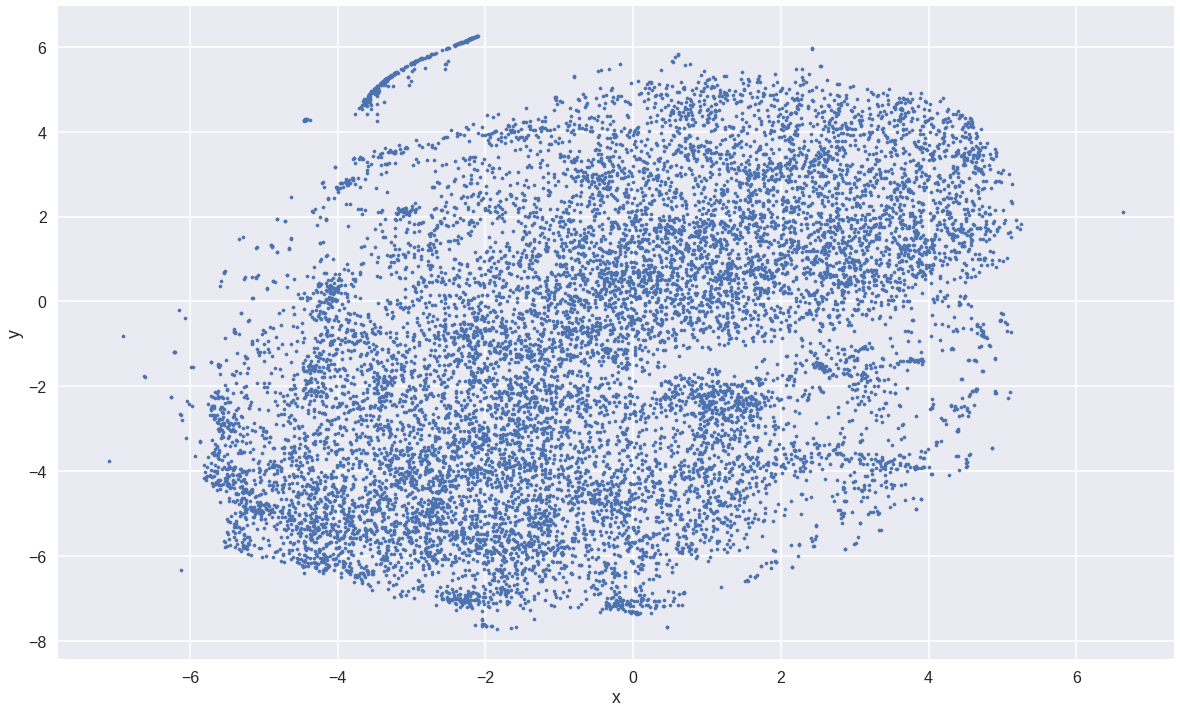

In [93]:
point.plot.scatter("x", "y", s=10, figsize =(20, 12))

In [165]:
def plot_region(x_limit, y_limit, point):
    slice = point[(x_limit[0] <= point.x) & 
                  (point.x <= x_limit[1]) &
                  (y_limit[0] <= point.y) &
                  (point.y <= y_limit[1])
    ]
    section = slice.plot.scatter("x", "y", s=35, figsize=(20,20))
    for i, point in slice.iterrows():
        section.text(point.x + 0.005, point.y + 0.005, point.words, fontsize = 11)

In [167]:
def get_region_word(word, vicinity):
    x = point[point['words'] == word]['x'].values
    y = point[point['words'] == word]['y'].values
    x_limit = ((x[0] - vicinity), (x[0] + vicinity))
    y_limit = ((y[0] - vicinity), (y[0] + vicinity))
    plot_region(x_limit=x_limit, y_limit=y_limit,point=point)

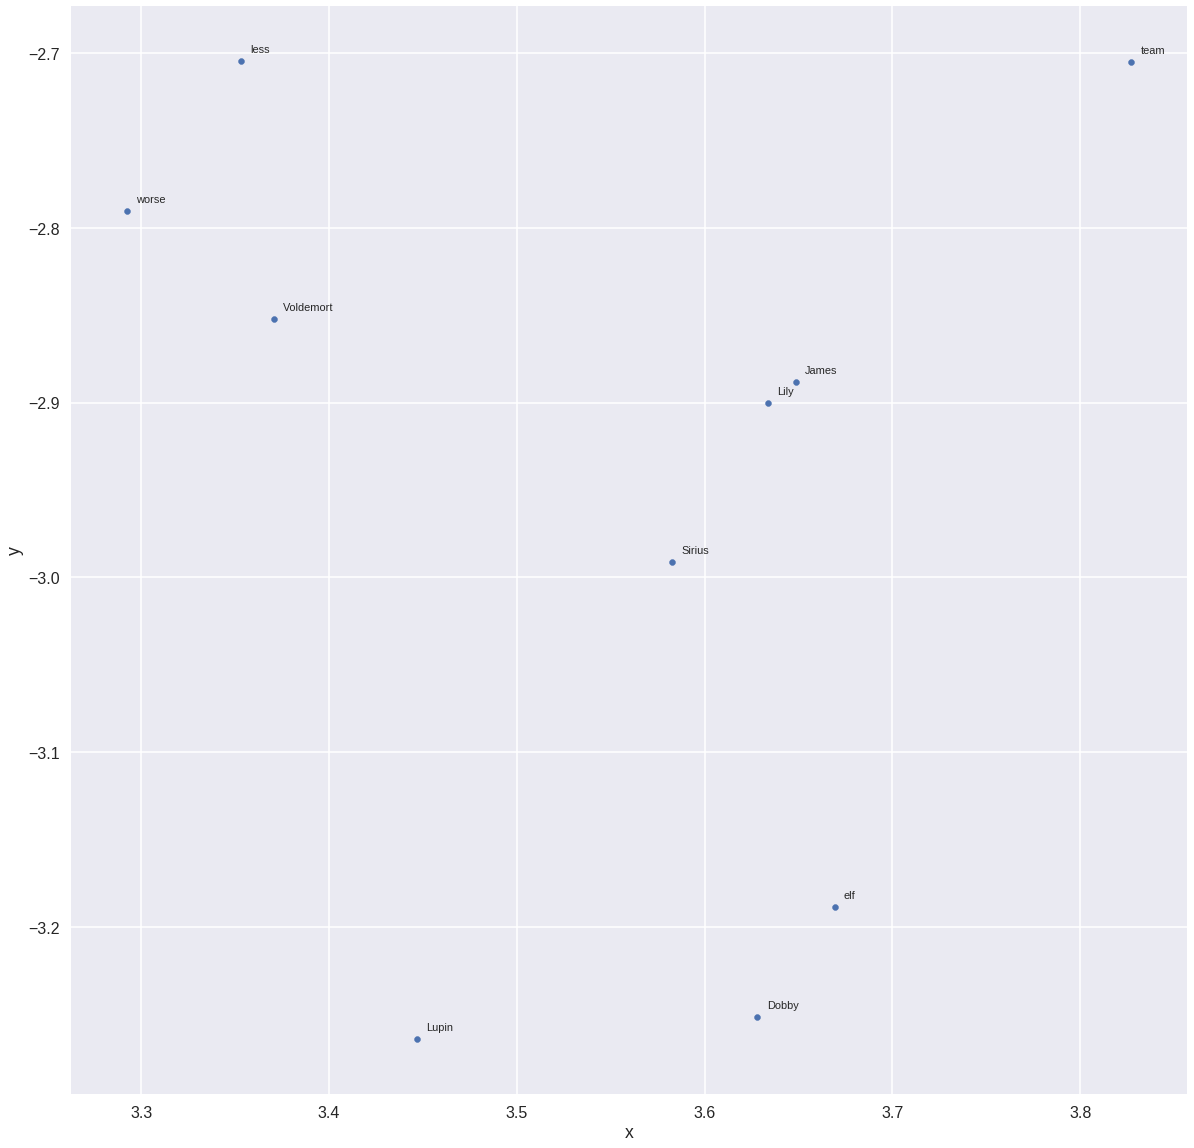

In [174]:
# Enter the word and vicinity radius ( square )
get_region_word("Sirius", 0.3)

In [179]:
words2vec.most_similar("Hagrid")

[(u'Fang', 0.6559556722640991),
 (u'Grawp', 0.6037800908088684),
 (u'Ronan', 0.5998028516769409),
 (u'yeh', 0.5702680349349976),
 (u'tha', 0.5691254138946533),
 (u'Aragog', 0.5612543225288391),
 (u'Xenophilius', 0.5528272986412048),
 (u'Buckbeak', 0.552046537399292),
 (u'ter', 0.5488696694374084),
 (u'Griphook', 0.5448915362358093)]

In [180]:
def nearest_similarity(start1, end1, end2):
    similarity = words2vec.most_similar_cosmul(positive=[end2, start1], negative=[end1])
    start2 = similarity[0][0]
    print ("{0} is related to {1}, as {2} is related to {3}".format(start1,end1,start2,end2))
    return start2

In [191]:
nearest_similarity("Ron", "Hermione", "Hagrid")

Ron is related to Hermione, as Fang is related to Hagrid
